# Computational Quantum Mechanics Basics: Statics


In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Discretization

Functions evaluated at discreted number of points:

abstract functions -> numpy arrays

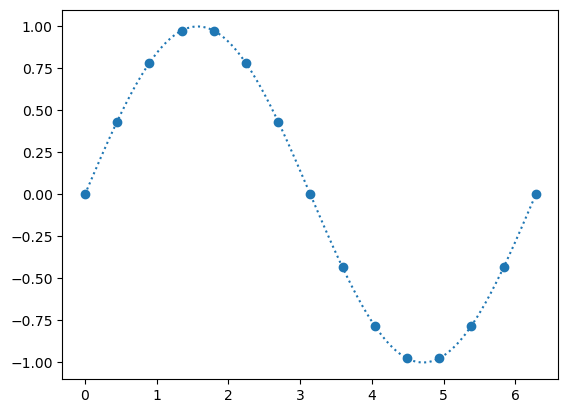

In [8]:
x = np.linspace(0,2*np.pi,1000)
y = np.sin(x)
plt.plot(x,y,ls=":")

x = np.linspace(0,2*np.pi,15)
y = np.sin(x)
plt.scatter(x,y)

## Wave functions

$$ || \phi || = \sqrt{\int_L |\phi(x)|^2 dx} $$

In [242]:
L = 3.0
N = 256
X = np.linspace(-L/2,L/2,N,endpoint=False)
dX = L/N

def hdot(a,b,sys):
    return np.sum(a.conj*b)*dX

def norm(phi):
    return np.sqrt(np.sum(np.abs(phi)**2)*dX)

fdc = np.array([1,-2,1])
laplacian = np.zeros(N)
for i in range(len(fdc)):
    laplacian[i-len(fdc)//2] = fdc[i]
laplacian /= dX*dX

## Example: free particle on a ring

$$ H = -\frac{1}{2}\Delta $$
$$ E_n = \frac{2\pi^2}{L^2} n^2 $$
$$ \psi_n = \frac{1}{\sqrt{L}} \exp ( 2 \pi i \frac{x}{L} n ) $$
$$ n \in \{...,-2,-1,0,1,2,...\} $$

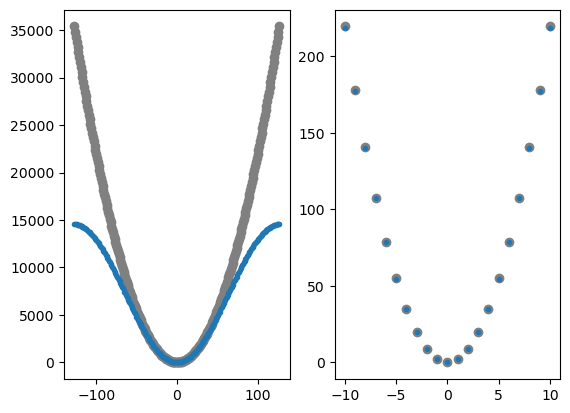

In [251]:
H = np.empty((N,N))
for i in range(N):
    kin = -0.5*np.roll(laplacian,i)
    H[i] = kin

eigvals, eigvecs = np.linalg.eigh(H)
eigvecs = eigvecs.T

for i in range(len(eigvecs)):
    eigvecs[i] /= norm(eigvecs[i])

n = [0]
for i in range((N-1)//2):
    n.append(i+1)
    n.append(-i-1)
n = np.array(n)
fig, ax = plt.subplots(1,2)
ax[0].scatter(n,2.0*np.pi*np.pi*n*n/L/L,marker="o",color="grey")
ax[0].scatter(n,eigvals[:len(n)],marker=".")
n = n[:21]
ax[1].scatter(n,2.0*np.pi*np.pi*n*n/L/L,marker="o",color="grey")
ax[1].scatter(n,eigvals[:len(n)],marker=".")

1.0


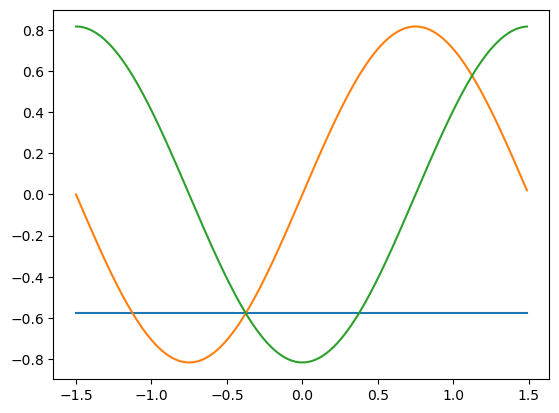

In [238]:
print(norm(eigvecs[0]))
plt.plot(X,eigvecs[0],X,eigvecs[1],X,eigvecs[2])

These are not plane waves... Why?

## Harmonic potential
$$ V = \frac{\omega^2}{2} x^2 $$
$$ E_n = \omega (n+\frac{1}{2}) $$
$$ n \in \{0,1,2,...\} $$

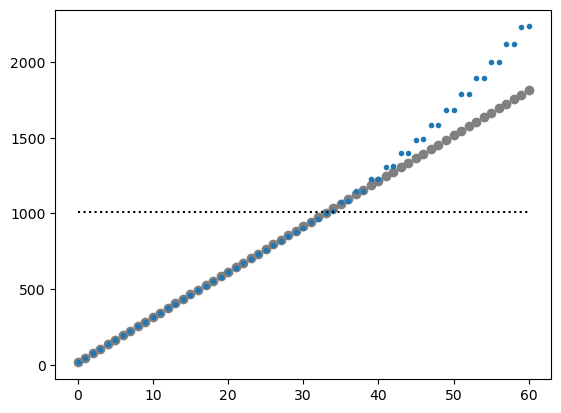

In [252]:
H = np.empty((N,N))
omega = 30.0
for i in range(N):
    kin = -0.5*np.roll(laplacian,i)
    H[i] = kin
    H[i,i] += (0.5*(omega**2))*(X[i]**2)

eigvals, eigvecs = np.linalg.eigh(H)
eigvecs = eigvecs.T

for i in range(len(eigvecs)):
    eigvecs[i] /= norm(eigvecs[i])

n = np.arange(61)
V_max = 0.5*(omega**2)*(L/2)**2
plt.hlines(V_max,n[0],n[-1],ls=":",color="black")
#plt.scatter(n,4.0*np.pi*np.pi*n*n/L/L,marker="o",color="grey")
plt.scatter(n,omega*(n+0.5),marker="o",color="grey")
plt.scatter(n,eigvals[:len(n)],marker=".")

1.0


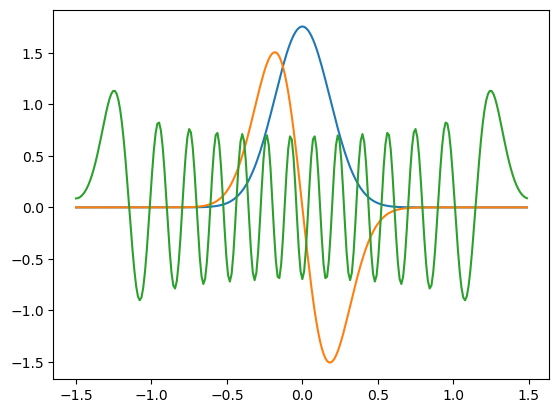

In [226]:
print(norm(eigvecs[0]))
plt.plot(X,eigvecs[0],X,eigvecs[1],X,eigvecs[26])

## Task 1

Construct infinite potential well hamiltonian, and plot its spectrum and eigen vectors. Compare with analytical results.

In [ ]:
# solution 1

## Higher order laplacian

## Task 2

Re-run above examples with higher order finite difference coefficients for the laplacian.


### Extra: "infinite" order laplacian

How to derive finite difference coefficients?

$$ \Delta_x \psi (x) = \Delta_x \int \delta(x-y) \psi(y) dy = \int \delta''(x-y) \psi(y) dy $$
$$ \frac{d}{dx} \to 2 \pi i k $$

In [239]:
c = np.zeros(N)
c[0] = 1.0
c = np.fft.rfft(c)
f = np.fft.rfftfreq(N)

laplacian = np.fft.irfft((-4.0*np.pi*np.pi/dX/dX)*f*f*c)

# now re-run free particle example